### Titanic - Machine Learning from Disaster dataset
The goal is to predict which passenger will survive on the Titanic using machine learning models.
data : https://www.kaggle.com/competitions/titanic/data
github : github.com/RecepTayyipIlhan




a.ii) I have more than a thousand passengers. They are the passengers who were on board the titanic crash. I will try to predict who will survive thanks to machine learning algorithms.

Feature explanation :

Survived:is survived ? (0 = No, 1 =Yes)

Pclass: class of ticket (1 = 1., 2 = 2., 3 = 3.)

Sex: gender

Sibsp: number of siblings or spouse of a person onboard

Parch: parents / children aboard the Titanic

Ticket: ticket id

Fare: fee of ticket

Cabin: cabin number

Embarked: embarkation ports

b) I chose this project because I can't believe that a computer can predict deaths in an accident.


### Importing Necessery Libraries

In [2]:
#data analysis libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Data Analysis


In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
103,104,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S
555,556,0,1,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,NaN,S
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S
780,781,1,3,"Ayoub, Miss. Banoura",female,13.0,0,0,2687,7.2292,NaN,C
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
586,587,0,2,"Jarvis, Mr. John Denzil",male,47.0,0,0,237565,15.0000,NaN,S


* Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
* Categorical Features: Survived, Sex, Embarked, Pclass
* Alphanumeric Features: Ticket, Cabin

* Survived: int
* Pclass: int
* Name: string
* Sex: string
* Age: float
* SibSp: int
* Parch: int
* Ticket: string
* Fare: float
* Cabin: string
* Embarked: string

In [6]:
pd.isnull(data).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Observarions :
* While choosing the data set, I thought that the "age" would have the most impact. But I'm missing 20% of the data so I'll try to fill them out :(
* The Cabin feature is missing approximately 77% of its values. Since so much of the feature is missing, it would be hard to fill in the missing values. I will remove whole feature from my dataset.



### Data Visualization

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


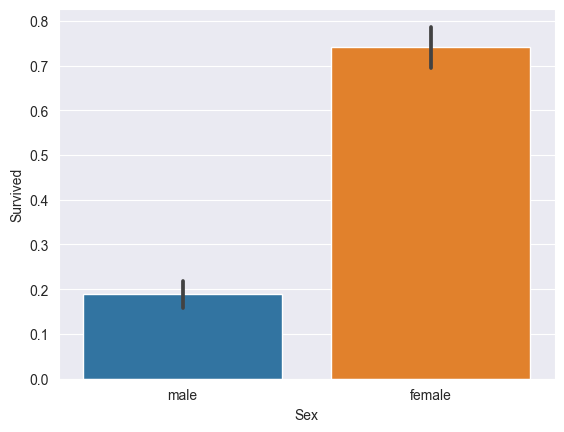

In [7]:
sns.barplot(x="Sex", y="Survived", data=data)

print("Percentage of females who survived:", data["Survived"][data["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", data["Survived"][data["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Comment : I think they put the women on the boat first, so sex feature is more important then I thought.

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


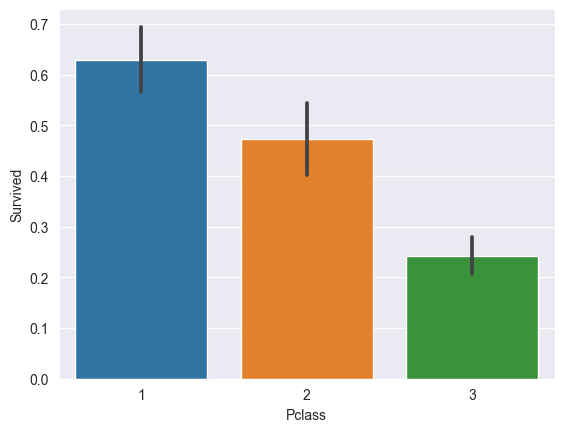

In [8]:
sns.barplot(x="Pclass", y="Survived", data=data)

print("Percentage of Pclass = 1 who survived:", data["Survived"][data["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", data["Survived"][data["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", data["Survived"][data["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Comment : As I thought, people with higher socioeconomic class had a higher rate of survival.

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


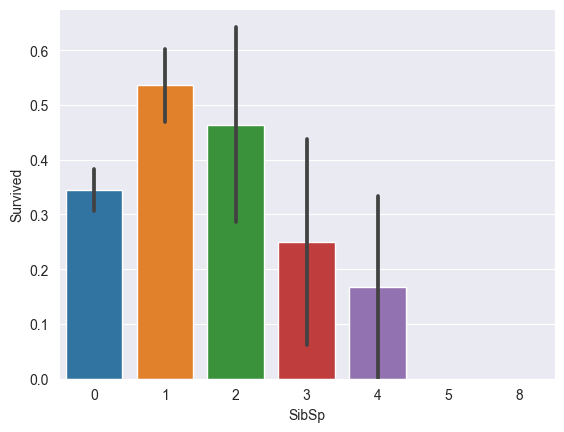

In [9]:
sns.barplot(x="SibSp", y="Survived", data=data)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", data["Survived"][data["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", data["Survived"][data["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", data["Survived"][data["SibSp"] == 2].value_counts(normalize = True)[1]*100)

Comment : it's clear that people with more siblings or spouses aboard were less likely to survive

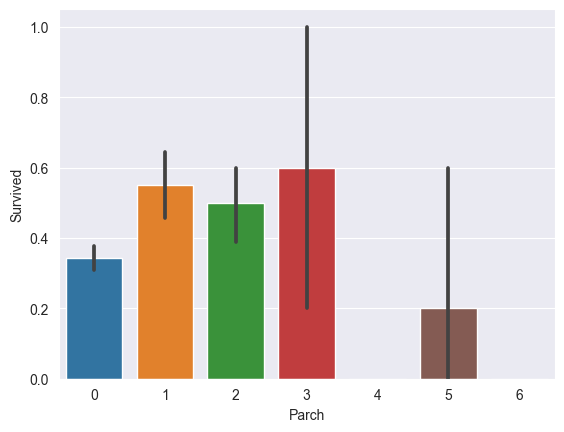

In [10]:
sns.barplot(x="Parch", y="Survived", data=data)
plt.show()

Comment : People with less than four parents or children aboard are more likely to survive than those with four or more.

### Age Feature

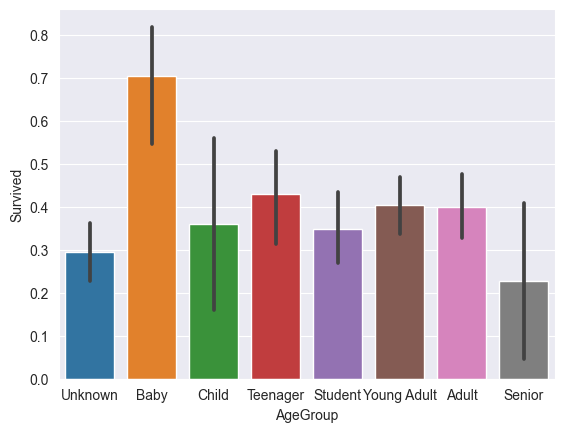

In [11]:
data["Age"] = data["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
data['AgeGroup'] = pd.cut(data["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

sns.barplot(x="AgeGroup", y="Survived", data=data)
plt.show()


Comment : Babies are more likely to survive than any other age group.

### Cabin Feature

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


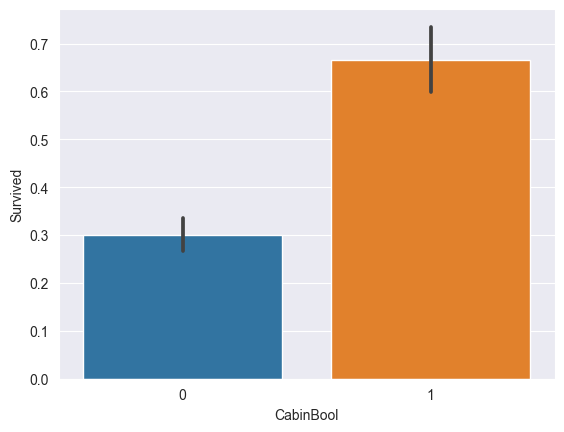

In [12]:
data["CabinBool"] = (data["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:", data["Survived"][data["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", data["Survived"][data["CabinBool"] == 0].value_counts(normalize = True)[1]*100)


sns.barplot(x="CabinBool", y="Survived", data=data)
plt.show()

In [13]:
# Q1 = data['Fare'].quantile(0.10)
# Q3 = data['Fare'].quantile(0.90)
# IQR = Q3 - Q1
# whisker_width = 1.5
# lower_whisker = Q1 - (whisker_width*IQR)
# upper_whisker = Q3 + (whisker_width*IQR)
# index=data['Fare'][(data['Fare']>upper_whisker)|(data['Fare']<lower_whisker)].index
# data.drop(index,inplace=True)

In [14]:
#sns.boxplot(data['Fare'],data=data['Fare'])

### Cleaning Data

In [15]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


* We have a total of 418 passengers.
* 1 value from the Fare feature is missing.
* Around 20.5% of the Age feature is missing, we will need to fill that in.

Fist I will remove cabin feature beacuse of so much missing values

In [16]:
train = data.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

Then I will remove ticket feature which is useless

In [17]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

Then I need to fill in the missing values in the Embarked feature

In [18]:
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [19]:
#replacing the missing values in the Embarked feature with S
train = train.fillna({"Embarked": "S"})

Next I'll fill in the missing values in the Age feature. Since a higher percentage of values are missing

In [20]:
combine = [train, test]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [21]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [22]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


In [23]:
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]

for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

In [24]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

In [25]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [26]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4.0,0,1
1,2,1,1,1,1,0,71.2833,C,6.0,1,3
2,3,1,3,1,0,0,7.9250,S,5.0,0,2
3,4,1,1,1,1,0,53.1000,S,5.0,1,3
4,5,0,3,0,0,0,8.0500,S,5.0,0,1


In [27]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4.0,0,1
1,2,1,1,1,1,0,71.2833,2,6.0,1,3
2,3,1,3,1,0,0,7.9250,1,5.0,0,2
3,4,1,1,1,1,0,53.1000,1,5.0,1,3
4,5,0,3,0,0,0,8.0500,1,5.0,0,1


In [28]:
# for x in range(len(test["Fare"])):
#     if pd.isnull(test["Fare"][x]):
#         pclass = test["Pclass"][x] #Pclass = 3
#         train["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
#
#
# train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
# test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])
#
# #drop Fare values
# train = train.drop(['Fare'], axis = 1)
# test = test.drop(['Fare'], axis = 1)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4.0,0,1
1,2,1,1,1,1,0,71.2833,2,6.0,1,3
2,3,1,3,1,0,0,7.9250,1,5.0,0,2
3,4,1,1,1,1,0,53.1000,1,5.0,1,3
4,5,0,3,0,0,0,8.0500,1,5.0,0,1


In this part, the Sex and Embarked are converted to a dummy numeric value. The Embarked feature in one column is converted into two columns, which essentially removes the colinearity here.¶

In [30]:
train = pd.get_dummies(train,columns=['Sex','Embarked'],drop_first=True)
test=pd.get_dummies(test,columns=['Sex','Embarked'],drop_first=True)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   AgeGroup     891 non-null    float64
 7   CabinBool    891 non-null    int32  
 8   Title        891 non-null    int64  
 9   Sex_1        891 non-null    uint8  
 10  Embarked_2   891 non-null    uint8  
 11  Embarked_3   891 non-null    uint8  
dtypes: float64(2), int32(1), int64(6), uint8(3)
memory usage: 61.9 KB


In [32]:
train.shape

(891, 12)

In [33]:
train.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,AgeGroup,CabinBool,Title,Sex_1,Embarked_2,Embarked_3
0,1,0,3,1,0,7.2500,4.0,0,1,0,0,0
1,2,1,1,1,0,71.2833,6.0,1,3,1,1,0
2,3,1,3,0,0,7.9250,5.0,0,2,1,0,0
3,4,1,1,1,0,53.1000,5.0,1,3,1,0,0
4,5,0,3,0,0,8.0500,5.0,0,1,0,0,0


### PCA (Princible Component Analysis)

In [34]:
print(train.corr())

             PassengerId  Survived    Pclass     SibSp     Parch      Fare  \
PassengerId     1.000000 -0.005007 -0.035144 -0.057527 -0.001652  0.012658   
Survived       -0.005007  1.000000 -0.338481 -0.035322  0.081629  0.257307   
Pclass         -0.035144 -0.338481  1.000000  0.083081  0.018443 -0.549500   
SibSp          -0.057527 -0.035322  0.083081  1.000000  0.414838  0.159651   
Parch          -0.001652  0.081629  0.018443  0.414838  1.000000  0.216225   
Fare            0.012658  0.257307 -0.549500  0.159651  0.216225  1.000000   
AgeGroup        0.040937 -0.106868 -0.283994 -0.326398 -0.259925  0.062691   
CabinBool       0.019919  0.316912 -0.725541 -0.040460  0.036987  0.482075   
Title           0.010871  0.373139 -0.184514  0.245915  0.284756  0.126883   
Sex_1          -0.042939  0.543351 -0.131900  0.114631  0.245489  0.182333   
Embarked_2     -0.001205  0.168240 -0.243292 -0.059528 -0.011069  0.269335   
Embarked_3     -0.033606  0.003650  0.221009 -0.026354 -0.081228

In [35]:
Av_Fare =test.Fare.mean()
test['Fare']=test.Fare.fillna(Av_Fare)

In [36]:
from sklearn.decomposition import PCA

df_1 = train.loc[:,['Fare','Pclass']]
df_2 = test.loc[:,['Fare','Pclass']]
pca =  PCA(n_components=1)
col_1 = pca.fit_transform(df_1)
col_2 = pca.fit_transform(df_2)

train['Mod_col_1']=col_1[:,0]
test['Mod_col_1']=col_2[:,0]

titanic=train.drop(['Fare','Pclass'], axis=1)
titanic_test=test.drop(['Fare','Pclass'], axis=1)

In [37]:
df_3 = train.loc[:,['SibSp','Parch']]
df_4 = test.loc[:,['SibSp','Parch']]
pca =  PCA(n_components=1)
col_3 = pca.fit_transform(df_3)
col_4 = pca.fit_transform(df_4)

train['Mod_col_2']=col_3[:,0]
test['Mod_col_2']=col_4[:,0]

train=train.drop(['SibSp','Parch'], axis=1)
test = test.drop(['SibSp','Parch'], axis=1)

In [38]:
titanic.shape

(891, 11)

In [39]:
# bilet ücreti ve bilet classı birbirleriyle ilişkili olduklarından PCA (boyut düşürme) yapılmıştır.

In [40]:
#train.head()


### Choosing the Best Model


In [41]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

# Testing Different Models

# Gaussian Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

77.66


# Logistic Regression


In [43]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)


79.7


 GRİD SEARCH  kullanılarak en iyi parametreler bulundu.

# Support Vector Machines

In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

71.07


In [45]:
# c1,c2,c3,c4=0.1,1,5,10
# kernel1 = "linear"
# kernel2 = "rbf"

def svc_param_selection(x,y,nfolds):
    C_datas = [0.001,0.01,0.1,1,2,5,10,50,100]
    gama_datas = [0.001,0.01,0.1,1]
    kernels = ["linear","rbf"]
    param_grid = {"C":C_datas,"gamma":gama_datas,"kernel":kernels}

    grid_search = GridSearchCV(SVC(),param_grid,cv=nfolds)
    grid_search.fit(x,y)
    return  print(grid_search.best_params_)
svc_param_selection(x_train,y_train,4)



{'C': 50, 'gamma': 0.001, 'kernel': 'linear'}


In [46]:

svc = SVC(kernel="linear",gamma=0.001,C=50)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

79.19


Hyper Parametre Tuning Sayesinde en model başarı oranı 71 den 80'e yükseldi

# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)


79.19


# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

84.77


# KNN or k-Nearest Neighbors

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)


78.17


In [50]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

80.2


In [51]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes',
              'Decision Tree', 'Stochastic Gradient Descent'],
    'Score': [acc_svc, acc_knn, acc_logreg,
              acc_randomforest, acc_gaussian, acc_decisiontree,
              acc_sgd]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,84.77
6,Stochastic Gradient Descent,80.20
2,Logistic Regression,79.70
0,Support Vector Machines,79.19
5,Decision Tree,79.19
1,KNN,78.17
4,Naive Bayes,77.66


# Cross Validation


In [52]:
from sklearn.model_selection import KFold

def run_kfold(clf):
    kf = KFold(n_splits=10, shuffle=False,random_state=None)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(x_train):
        fold += 1
        Xtrain, Xtest = x_train.values[train_index], x_train.values[test_index]
        ytrain, ytest = y_train.values[train_index], y_train.values[test_index]
        clf.fit(Xtrain, ytrain)
        predictions = clf.predict(Xtest)
        accuracy = accuracy_score(ytest, predictions)
        outcomes.append(accuracy)
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome))

In [53]:
random_forest = RandomForestClassifier()
run_kfold(random_forest)

Mean Accuracy: 0.7996273291925465


# Result :

Projede istenilen tahmin oranına ulaşılmıştır. En iyi sonucu random forest modeli vermektedir. Hyper parametre tuning sayesinde modellerin ne kadar iyileşebileceği gözlenmiştir. Kfold cross validation kullanılarak ortalam error hesaplanmıştır.